Multiclass Classification of the Iris Dataset

The Iris dataset is a well-known dataset used in machine learning for multiclass classification because it contains 150 samples of iris flowers with four features (sepal length, sepal width, petal length, petal width) and labels representing three different species: Setosa, Versicolor, and Virginica. It is widely used due to its simplicity, balanced classes, and the fact that it requires minimal preprocessing. The dataset provides an excellent introduction to multiclass classification, allowing practitioners to explore various algorithms and visualize decision boundaries while dealing with a small, clean, and well-structured dataset.

In [213]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [214]:
iris = load_iris() #load  iris dataset
X = iris.data
y = iris.target
print(X.shape) #Notice when printed is a 150x4 matrix representing each feature (sepal length, sepal width, petal length, petal width)

(150, 4)


In [215]:
y #each number represents each species of flower

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Create Dataframe from data

In [216]:
iris_df = pd.DataFrame({'X1': X[:,0],
                        'X2': X[:,1],
                        'X3': X[:,2],
                        'X4': X[:,3],
                        'y': y
                        
                        })

iris_df.head(10)

,X1,X2,X3,X4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [217]:
iris_df.y.value_counts() #shows the number of each y value type

y
0    50
1    50
2    50
Name: count, dtype: int64

Charts to show this info: 6 total plots to show each combiantion of features, four featires therefore, 4 choose 2, 

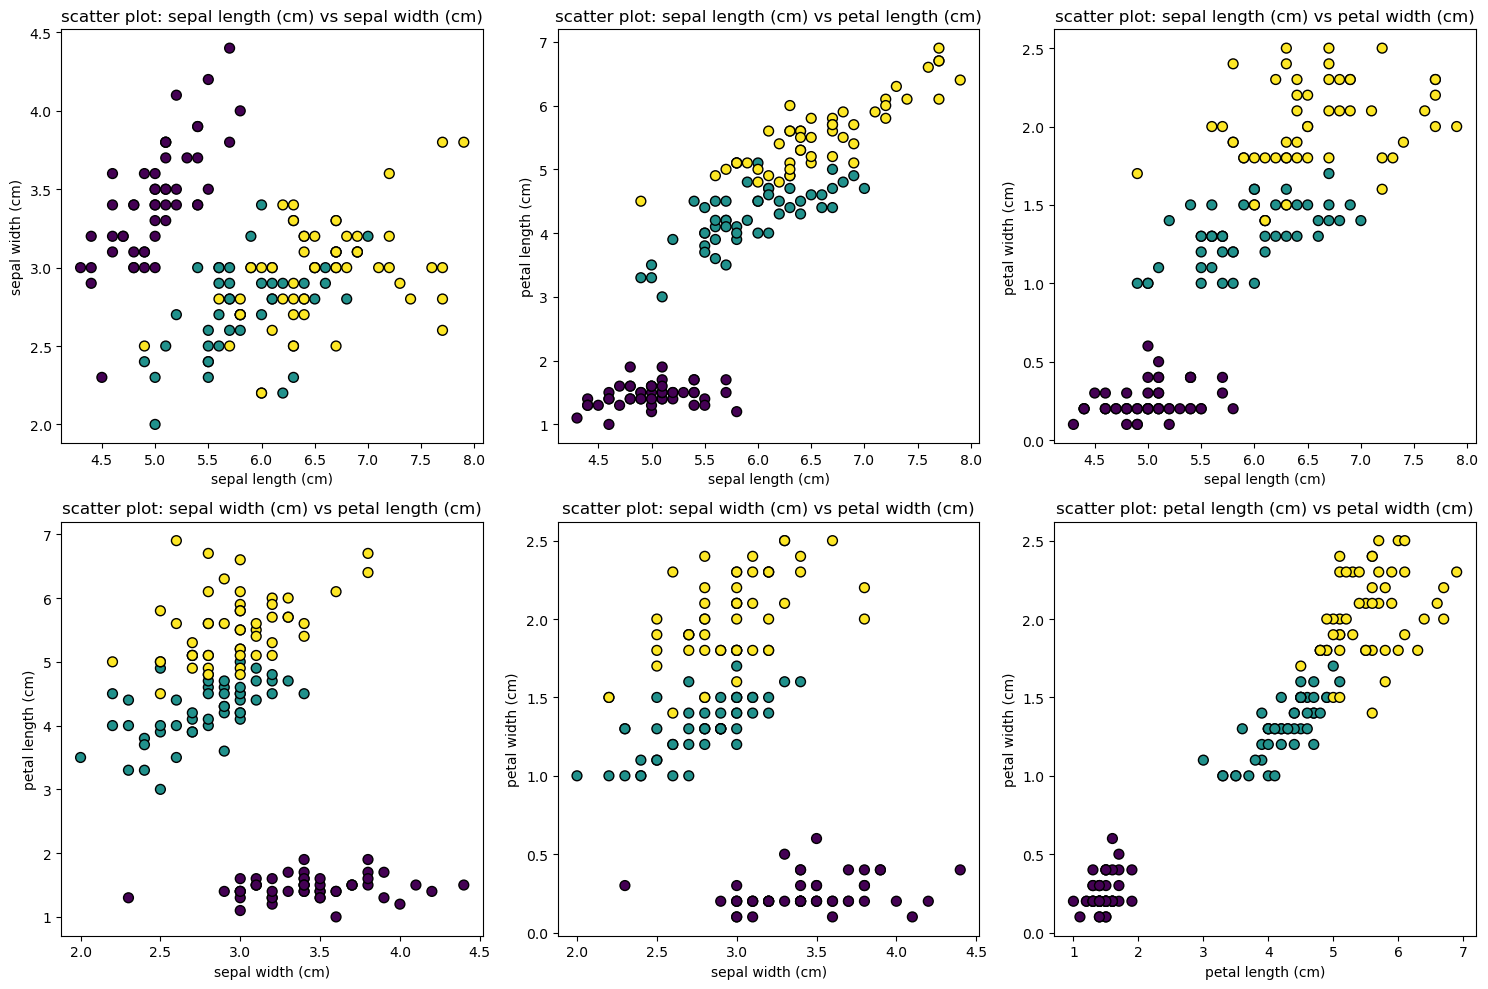

In [218]:
fig,axes = plt.subplots(2,3,figsize=(15,10))

feature_combinations = [(0,1), (0,2), (0,3), (1,2),(1,3) ,(2,3)]

for ax, features in zip(axes.flatten(), feature_combinations):
    feature1,feature2 = features
    ax.scatter(X[:,feature1],X[:,feature2],c=y,cmap = 'viridis',edgecolor = 'k', s=50)
    ax.set_xlabel(iris.feature_names[feature1])
    ax.set_ylabel(iris.feature_names[feature2])
    ax.set_title(f'scatter plot: {iris.feature_names[feature1]} vs {iris.feature_names[feature2]}')


plt.tight_layout()
plt.show()
    

Train test split the data

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) #random arbirtraty value, then use 20%of the data to test

Scale the data

In [220]:
scaler =  StandardScaler() #uses a standad scaler to scale the data
X_train = scaler.fit_transform(X_train) #fit - calculates mean and std then transform applies thsi standardisation, always standardise using training data
X_test = scaler.transform(X_test) #this applies the same scaler as before to ensure both data have been scaled int he same way

Set a device to run on

In [221]:
#device = 'cuda' if torch.cuda.is_available() else 'cpu' #run on GPU else on CPUdevice = 'cpu'
device = 'cpu'

Convert data into tensors

In [222]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64).to(device)

Build Class

In [223]:
class SimpleClassifier(nn.Module): #inherit nn module
    def __init__(self, in_features, out_features):
        super().__init__()
        self.layer_1 = nn.Linear(in_features,120) #first layer - whatever you end with must start with in next layer - ie 120
        self.layer_2 = nn.Linear(120,10) #starts with 120
        self.layer_3 = nn.Linear(10,out_features) #end with out features

    def forward(self,x):
        x = self.layer_3(self.layer_2(self.layer_1(x))) #Data is passed on starts layer 1 -> layer 2 -> layer 3
        return x

In [224]:
in_features = X_train.shape[1] #looks at num columns
num_classes = len(set(y)) #removes duplicates ie only want the three types of flowers

model = SimpleClassifier(in_features, num_classes).to(device) ##dont need out featues as this is the num of classes in multi classificatio [roblem]



Set Criterion and Optimiser

In [225]:
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr = 0.2)

Set training loop

In [226]:
num_epochs = 5
# Main training loop that iterates over a fixed number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode (this is crucial for layers like dropout and batchnorm)
    
    # Forward pass: Pass the input data through the model to get predictions (outputs)
    outputs = model(X_train_tensor)
    
    # Compute the loss by comparing the model's predictions with the actual labels
    loss = criterion(outputs, y_train_tensor)
    
    # Determine the predicted class labels by taking the index of the maximum value in each prediction
    # torch.max returns both the max value and its index; we only care about the index (predicted label)
    _, predicted_labels = torch.max(outputs, 1)
    
    # Calculate the number of correct predictions by comparing predicted labels with actual labels
    correct_predictions = (predicted_labels == y_train_tensor).sum().item()
    
    # Calculate total number of samples and accuracy as the ratio of correct predictions to total samples
    total_samples = len(y_train_tensor)
    acc = correct_predictions / total_samples
    
    # Zero out (clear) the gradients from the previous iteration
    optimiser.zero_grad()
    
    # Backward pass: Compute gradients of the loss with respect to model parameters
    loss.backward()
    
    # Update the model parameters using the computed gradients (based on the optimization algorithm, e.g., SGD)
    optimiser.step()
    
    # Print the loss and accuracy every 10 epochs to monitor progress
    if (epoch + 1) % 10 == 0:
        print(f'epoch [{epoch+1}/{num_epochs}], loss: {loss.item(): .4f}, accuracy: {acc: .4f}')


Evaluate using test set

In [227]:
model.eval()
with torch.inference_mode():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs,1)


    accuracy = accuracy_score(y_test, predicted.cpu().numpy()) #need to move tensors to cpu befpre converting to numpy array

    predicted_tensor = predicted.clone().detach()
    loss = criterion(outputs, predicted_tensor)

    print(f'loss: {loss.item(): .4f}, accuracy: {accuracy: .4f}')

loss:  0.2994, accuracy:  0.9000


Visulise the results (from chat gpt)

Confusion Matrix - 

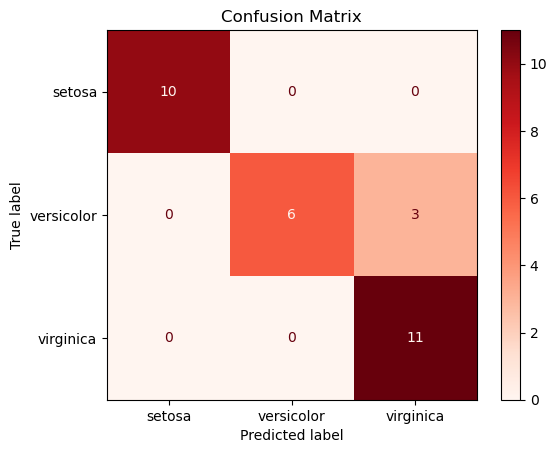

In [228]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate using test set
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    
    # Convert tensors to numpy arrays
    y_test_np = y_test_tensor.cpu().numpy()
    predicted_np = predicted.cpu().numpy()
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_np, predicted_np, labels=np.arange(num_classes))
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap='Reds', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()

